# Analisis de una base de datos de automobiles y su eficiencia
## Cristóbal Collao
### Ingeniería en Estadistica 
### Introducción
El siguiente proyecto a llevar a cabo es un análisis de una base de datos sobre la eficencia y rendimiento de autovóbiles entregado por un organismo gubernamental de los Estados Unidos encontrado y difundido públicamente en la página https://fueleconomy.gov .
El proyecto que presentaré se encuentra originalmente en el libro *Practical Data Science Cookbook* de Tony Ojeda y funcionará como práctica para el aprendizaje de el lenguaje de programación R
El trabajo trata además de entregar datos visuales a través de gráficos sobre la eficiencia y los distintos objetivos que se buscan del trabajo

# Desarrollo

Primero partimos accediendo a las librerias señaladsa en el libro para llevar acabo el proyecto 

In [5]:
library(plyr)
library(ggplot2)
library(reshape2) 

luego configuramos el directorio de trabajo en donde se guardará el proyecto y de donde se tomará la base de datos. 
Este paso uno se lo puede ahorrar si trabajo en jupyter

Ahora que tenemos los preparativos para el proyecto, comenzamos con este.
Lo primero a hacer es importar la base de datos usando el comando read.csv, este también puede leer bases de datos de archivos comprimidos, poniendo el nombre del zip y la base de datos

In [56]:
vehicles <- read.csv("vehicles.csv",stringsAsFactors = F) #leemos la base de datos de dentro de una zip
vehicles

barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,...,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
15.69571,0,0,0,19,0,0,0,0,0,...,,,0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
29.96455,0,0,0,9,0,0,0,0,0,...,,,0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
12.20778,0,0,0,23,0,0,0,0,0,...,,,0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
29.96455,0,0,0,10,0,0,0,0,0,...,,,0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
17.34789,0,0,0,17,0,0,0,0,0,...,,,0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
14.98227,0,0,0,21,0,0,0,0,0,...,,,0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
13.18440,0,0,0,22,0,0,0,0,0,...,,,0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
13.73375,0,0,0,23,0,0,0,0,0,...,,,0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
12.67731,0,0,0,23,0,0,0,0,0,...,,,0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0


Para comprobar que la base de datos se importara corréctamente usamos el comando head(La base de datos) para que nos arroje una muestra de las 6 primeras filas de nuestra base de datos, junto con los encabezados de las variables 

In [7]:
head(vehicles)

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,...,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,15.69571,0,0,0,19,0,0,0,0,0,...,,,0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
2,29.96455,0,0,0,9,0,0,0,0,0,...,,,0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
3,12.20778,0,0,0,23,0,0,0,0,0,...,,,0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
4,29.96455,0,0,0,10,0,0,0,0,0,...,,,0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
5,17.34789,0,0,0,17,0,0,0,0,0,...,,,0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
6,14.98227,0,0,0,21,0,0,0,0,0,...,,,0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0


procedemos a leer en formato de tabla un archivo preparado anteriormente en donde extrajimos de la página de internet de la base de datos, las etiquetas de las variables que confeccionan la base de datos

In [8]:
labels <- read.table("varlabels.txt", sep = "-", header =FALSE)
labels

V1,V2
<fct>,<fct>
cityE,city electricity consumption in kw-hrs/100 miles
cityUF,EPA city utility factor (share of electricity) for PHEV
co2,tailpipe CO2 in grams/mile for fuelType1 (5)
co2A,tailpipe CO2 in grams/mile for fuelType2 (5)
co2TailpipeAGpm,tailpipe CO2 in grams/mile for fuelType2 (5)
co2TailpipeGpm,tailpipe CO2 in grams/mile for fuelType1 (5)
comb08,"combined MPG for fuelType1 (2), (11)"
comb08U,"unrounded combined MPG for fuelType1 (2), (3)"
combA08,combined MPG for fuelType2 (2)


leemos las lineas del archivo de texto y la ingresamos en la variable auxiliar x

In [9]:
x <- readLines("varlabels.txt")
x

Warning message in readLines("varlabels.txt"):
"incomplete final line found on 'varlabels.txt'"


[1] "    \"cityE\" - \"city electricity consumption in kw-hrs/100 miles\""                                                                                                                                                       
 [2] "    \"cityUF\" - \"EPA city utility factor (share of electricity) for PHEV\""                                                                                                                                               
 [3] "    \"co2\" - \"tailpipe CO2 in grams/mile for fuelType1 (5)\""                                                                                                                                                             
 [4] "    \"co2A\" - \"tailpipe CO2 in grams/mile for fuelType2 (5)\""                                                                                                                                                            
 [5] "    \"co2TailpipeAGpm\" - \"tailpipe CO2 in grams/mile for fuelType2 (5)\""                                                                                                                                                 
 [6] "    \"co2TailpipeGpm\" - \"tailpipe CO2 in grams/mile for fuelType1 (5)\""                                                                                                                                                  
 [7] "    \"comb08\" - \"combined MPG for fuelType1 (2), (11)\""                                                                                                                                                                  
 [8] "    \"comb08U\" - \"unrounded combined MPG for fuelType1 (2), (3)\""                                                                                                                                                        
 [9] "    \"combA08\" - \"combined MPG for fuelType2 (2)\""                                                                                                                                                                       
[10] "    \"combA08U\" - \"unrounded combined MPG for fuelType2 (2), (3)\""                                                                                                                                                       
[11] "    \"combE\" - \"combined electricity consumption in kw-hrs/100 miles\""                                                                                                                                                   
[12] "    \"combinedCD\" - \"combined gasoline consumption (gallons/100 miles) in charge depleting mode (4)\""                                                                                                                    
[13] "    \"combinedUF\" - \"EPA combined utility factor (share of electricity) for PHEV\""                                                                                                                                       
[14] "    \"cylinders\" - \"engine cylinders\""                                                                                                                                                                                   
[15] "    \"displ\" - \"engine displacement in liters\""                                                                                                                                                                          
[16] "    \"drive\" - \"drive axle type\""                                                                                                                                                                                        
[17] "    \"emissionsList\" - \"LAS QUE NO SIRVEN\""                                                                                                                                                                              
[18] "    \"engId\" - \"EPA model type index\""                                                                                               

cada linea debe ser dividida por el símbolo "-"

In [10]:
y <- strsplit(x, " - ")
y

[[1]]
[1] "    \"cityE\""                                       
[2] "\"city electricity consumption in kw-hrs/100 miles\""

[[2]]
[1] "    \"cityUF\""                                             
[2] "\"EPA city utility factor (share of electricity) for PHEV\""

[[3]]
[1] "    \"co2\""                                     
[2] "\"tailpipe CO2 in grams/mile for fuelType1 (5)\""

[[4]]
[1] "    \"co2A\""                                    
[2] "\"tailpipe CO2 in grams/mile for fuelType2 (5)\""

[[5]]
[1] "    \"co2TailpipeAGpm\""                         
[2] "\"tailpipe CO2 in grams/mile for fuelType2 (5)\""

[[6]]
[1] "    \"co2TailpipeGpm\""                          
[2] "\"tailpipe CO2 in grams/mile for fuelType1 (5)\""

[[7]]
[1] "    \"comb08\""                          
[2] "\"combined MPG for fuelType1 (2), (11)\""

[[8]]
[1] "    \"comb08U\""                                  
[2] "\"unrounded combined MPG for fuelType1 (2), (3)\""

[[9]]
[1] "    \"combA08\""                    "\"combined MPG for fuelType2 (2)\""

[[10]]
[1] "    \"combA08U\""                                 
[2] "\"unrounded combined MPG for fuelType2 (2), (3)\""

[[11]]
[1] "    \"combE\""                                           
[2] "\"combined electricity consumption in kw-hrs/100 miles\""

[[12]]
[1] "    \"combinedCD\""                                                                
[2] "\"combined gasoline consumption (gallons/100 miles) in charge depleting mode (4)\""

[[13]]
[1] "    \"combinedUF\""                                             
[2] "\"EPA combined utility factor (share of electricity) for PHEV\""

[[14]]
[1] "    \"cylinders\""    "\"engine cylinders\""

[[15]]
[1] "    \"displ\""                     "\"engine displacement in liters\""

[[16]]
[1] "    \"drive\""       "\"drive axle type\""

[[17]]
[1] "    \"emissionsList\"" "\"LAS QUE NO SIRVEN\""

[[18]]
[1] "    \"engId\""            "\"EPA model type index\""

[[19]]
[1] "    \"eng_dscr\""                                                                   
[2] "\"engine descriptor; see http://www.fueleconomy.gov/feg/findacarhelp.shtml#engine\""

[[20]]
[1] "    \"evMotor\""             "\"electric motor (kw-hrs)\""

[[21]]
[1] "    \"feScore\""                                
[2] "\"EPA Fuel Economy Score (-1 = Not available)\""

[[22]]
[1] "    \"fuelCost08\""                        
[2] "\"annual fuel cost for fuelType1 ($) (7)\""

[[23]]
[1] "    \"fuelCostA08\""                       
[2] "\"annual fuel cost for fuelType2 ($) (7)\""

[[24]]
[1] "    \"fuelType\""                                          
[2] "\"fuel type with fuelType1 and fuelType2 (if applicable)\""

[[25]]
[1] "    \"fuelType1\""                                                                                                                 
[2] "\"fuel type 1. For single fuel vehicles, this will be the only fuel. For dual fuel vehicles, this will be the conventional fuel.\""

[[26]]
[1] "    \"fuelType2\""                                                                                                                                             
[2] "\"fuel type 2. For dual fuel vehicles, this will be the alternative fuel (e.g. E85, Electricity, CNG, LPG). For single fuel vehicles, this field is not used\""

[[27]]
[1] "    \"ghgScore\""                      
[2] "\"EPA GHG score (-1 = Not available)\""

[[28]]
[1] "    \"ghgScoreA\""                                                                           
[2] "\"EPA GHG score for dual fuel vehicle running on the alternative fuel (-1 = Not available)\""

[[29]]
[1] "    \"guzzler\"- \"if G or T, this vehicle is subject to the gas guzzler tax\""

[[30]]
[1] "    \"highway08\""                      
[2] "\"highway MPG for fuelType1 (2), (11)\""

[[31]]
[1] "    \"highway08U\""                              
[2] "\"unrounded highway MPG for fuelType1 (2), (3)\""

[[32]]
[1] "    \"highwayA08\""                "\"highway MPG for fuelType2 (2)\""

[[33]]

Ahora a partir de la variable y, creamos una matriz donde en la primera columna está el nombre de la variable y en la segunda columna la etiqueta o descripción de esta variable

In [11]:
labels <- do.call(rbind, y)
labels

"""cityE""","""city electricity consumption in kw-hrs/100 miles"""
"""cityUF""","""EPA city utility factor (share of electricity) for PHEV"""
"""co2""","""tailpipe CO2 in grams/mile for fuelType1 (5)"""
"""co2A""","""tailpipe CO2 in grams/mile for fuelType2 (5)"""
"""co2TailpipeAGpm""","""tailpipe CO2 in grams/mile for fuelType2 (5)"""
"""co2TailpipeGpm""","""tailpipe CO2 in grams/mile for fuelType1 (5)"""
"""comb08""","""combined MPG for fuelType1 (2), (11)"""
"""comb08U""","""unrounded combined MPG for fuelType1 (2), (3)"""
"""combA08""","""combined MPG for fuelType2 (2)"""
"""combA08U""","""unrounded combined MPG for fuelType2 (2), (3)"""
"""combE""","""combined electricity consumption in kw-hrs/100 miles"""


Ahora que tenemos la base de datos completa con las etiquetas de las variables y empezamos el análisis y exploración de la base de datos.

Primero empezamos con conocer las dimensiones de la base de datos.
Buscamos saber la cantidad de filas de la base de datos, que serian la cantidad de casos o de autos a analizar
Luego conocemos la cantidad de columnas, que son el total de las variables

In [12]:
nrow(vehicles)
ncol(vehicles)

[1] 40704

[1] 83

Luego obtenemos los nombres de las variables con la función names 

In [13]:
print (names(vehicles))

 [1] "barrels08"       "barrelsA08"      "charge120"       "charge240"      
 [5] "city08"          "city08U"         "cityA08"         "cityA08U"       
 [9] "cityCD"          "cityE"           "cityUF"          "co2"            
[13] "co2A"            "co2TailpipeAGpm" "co2TailpipeGpm"  "comb08"         
[17] "comb08U"         "combA08"         "combA08U"        "combE"          
[21] "combinedCD"      "combinedUF"      "cylinders"       "displ"          
[25] "drive"           "engId"           "eng_dscr"        "feScore"        
[29] "fuelCost08"      "fuelCostA08"     "fuelType"        "fuelType1"      
[33] "ghgScore"        "ghgScoreA"       "highway08"       "highway08U"     
[37] "highwayA08"      "highwayA08U"     "highwayCD"       "highwayE"       
[41] "highwayUF"       "hlv"             "hpv"             "id"             
[45] "lv2"             "lv4"             "make"            "model"          
[49] "mpgData"         "phevBlended"     "pv2"             "pv4"            

Para adentrarnos más en la evolución de la eficiencia de los automoviles a través del tiempo
empezamos con usar la funcion unique para saber cuantos valores unicos existen en la variable year, con lo que sabríamos los vehiculos de cuantos años distintos tenemos

In [14]:
length(unique(vehicles[, "year"]))

[1] 36

Luego querremos saber cual es el valor menos y el mayor de la variable años, por lo que usamos la funcion min y max
Obtendremos de que año es el auto más antiguo en la base de datos, a su vez, el auto más nuevo

In [15]:
first_year <- min(vehicles[, "year"])
last_year <- max(vehicles[, "year"])
first_year
last_year


[1] 1984

[1] 2019

Solo para comprobar que tenemos casos para todos los años entre 1984 y 2019 usamos la funcion lenght unique para saber los valores unicos en años

In [16]:
length(unique(vehicles$year)) #ya que conocemos el primer año y el ultimo año, se verifica si tenemos todos los años cubiertos para analizar la base de datos 

[1] 36

Ahora indagando en otra variable, generamos una tabla con los datos de la variable fuelType1, para conocer los tipos de gasolina utilizados en los autos que nos entrega la base de datos.  Podemos ver que la la gasolina regular y la premium son las mas utilizadas
A su vez la menos comun es el gas natural

In [17]:
table(vehicles$fuelType1)


           Diesel       Electricity Midgrade Gasoline       Natural Gas 
             1158               177               106                60 
 Premium Gasoline  Regular Gasoline 
            11540             27663 

Luego, para empezar a explorar la variable trany que es el tipo de transmisión que tiene el auto, se empieza con reemplazar los valores perdidos a NA para que no alteren la muestra

In [18]:
vehicles$trany[vehicles$trany == ""] <- NA #se transforman los datos perdidos a NA
vehicles$trany

[1] "Manual 5-spd"                     "Manual 5-spd"                    
    [3] "Manual 5-spd"                     "Automatic 3-spd"                 
    [5] "Manual 5-spd"                     "Automatic 3-spd"                 
    [7] "Manual 5-spd"                     "Automatic 3-spd"                 
    [9] "Manual 5-spd"                     "Automatic 4-spd"                 
   [11] "Manual 5-spd"                     "Automatic 4-spd"                 
   [13] "Manual 5-spd"                     "Automatic 4-spd"                 
   [15] "Automatic 3-spd"                  "Manual 5-spd"                    
   [17] "Automatic 4-spd"                  "Manual 5-spd"                    
   [19] "Automatic 4-spd"                  "Manual 5-spd"                    
   [21] "Automatic 5-spd"                  "Automatic 5-spd"                 
   [23] "Automatic 4-spd"                  "Automatic 3-spd"                 
   [25] "Automatic 3-spd"                  "Manual 4-spd"                    
   [27] "Automatic 4-spd"                  "Automatic 3-spd"                 
   [29] "Automatic 4-spd"                  "Automatic 4-spd"                 
   [31] "Automatic 4-spd"                  "Automatic 4-spd"                 
   [33] "Automatic 4-spd"                  "Automatic 4-spd"                 
   [35] "Automatic 4-spd"                  "Automatic 3-spd"                 
   [37] "Manual 4-spd"                     "Automatic 3-spd"                 
   [39] "Automatic 4-spd"                  "Automatic 4-spd"                 
   [41] "Manual 5-spd"                     "Automatic 4-spd"                 
   [43] "Manual 5-spd"                     "Automatic 4-spd"                 
   [45] "Automatic 4-spd"                  "Automatic 4-spd"                 
   [47] "Manual 5-spd"                     "Automatic 3-spd"                 
   [49] "Automatic 3-spd"                  "Automatic 4-spd"                 
   [51] "Automatic 4-spd"                  "Automatic 3-spd"                 
   [53] "Automatic 3-spd"                  "Manual 5-spd"                    
   [55] "Automatic 3-spd"                  "Automatic 4-spd"                 
   [57] "Automatic 4-spd"                  "Manual 5-spd"                    
   [59] "Automatic 3-spd"                  "Automatic 4-spd"                 
   [61] "Automatic 4-spd"                  "Automatic 4-spd"                 
   [63] "Manual 5-spd"                     "Automatic 4-spd"                 
   [65] "Automatic 4-spd"                  "Manual 5-spd"                    
   [67] "Automatic 4-spd"                  "Automatic 4-spd"                 
   [69] "Automatic 4-spd"                  "Automatic 3-spd"                 
   [71] "Automatic 4-spd"                  "Automatic 4-spd"                 
   [73] "Automatic 4-spd"                  "Automatic 4-spd"                 
   [75] "Automatic 4-spd"                  "Automatic 4-spd"                 
   [77] "Manual 5-spd"                     "Automatic 4-spd"                 
   [79] "Manual 5-spd"                     "Automatic 4-spd"                 
   [81] "Automatic 3-spd"                  "Automatic 3-spd"                 
   [83] "Automatic 3-spd"                  "Automatic 4-spd"                 
   [85] "Automatic 3-spd"                  "Automatic 4-spd"                 
   [87] "Automatic 4-spd"                  "Manual 5-spd"                    
   [89] "Automatic 4-spd"                  "Automatic 3-spd"                 
   [91] "Automatic 3-spd"                  "Automatic 3-spd"                 
   [93] "Manual 5-spd"                     "Automatic 3-spd"                 
   [95] "Automatic 4-spd"                  "Automatic 3-spd"                 
   [97] "Automatic 4-spd"                  "Automatic 4-spd"                 
   [99] "Manual 5-spd"                     "Automatic 4-spd"                 
  [101] "Automatic 4-spd"                  "Automatic 4-spd"                 
  [103] "Automatic 4-spd" 

Ahora para facilitar el análizis de la variable, se genera una variable trany2 a partir de la variable trany, donde se leen las primeras 4 letras (dado que es una variable string) de cada valor de la variable trany, y si estas letras corresponden a "Auto", se achica el valor de este y se asigna auto (de transmisión automática), si no es así, se asigna el valor "Manual" (que correspondería a los autos con transmisión Manual)

In [19]:
vehicles$trany2 <- ifelse(substr(vehicles$trany, 1, 4) =="Auto", "Auto", "Manual")

Finalmente se transforma la nueva variable a factor, o variable categórica. Y se genera una tabla para ver la distribución de esta 

In [20]:
vehicles$trany <- as.factor(vehicles$trany)
table(vehicles$trany2)


  Auto Manual 
 27928  12765 

Aqui se explora la cantidad de modelos por año que no contienen un supercharger (sobrealimentador) y los que si vienen con supercharger integrado

In [21]:
with(vehicles, table(sCharger, year))

        year
sCharger 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
         1964 1701 1210 1247 1130 1149 1074 1130 1116 1088  979  962  767  757
       S    0    0    0    0    0    4    4    2    5    5    3    5    6    5
        year
sCharger 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
          800  840  826  891  949 1015 1089 1136 1067 1098 1152 1165 1091 1105
       S   12   12   14   20   26   29   33   30   37   28   35   19   18   25
        year
sCharger 2012 2013 2014 2015 2016 2017 2018 2019
         1124 1142 1156 1218 1196 1230 1276 1047
       S   28   42   65   60   61   63   60   61

Aqui exploramos dentro de la variable sCharger el tipo de variable y los valores únicos que encontramos en esta variable

In [22]:
class(vehicles$sCharger)
unique(vehicles$sCharger)

[1] "character"

[1] ""  "S"

Luego en la variable tCharguer (o turbo charger) se explora el tipo de variable y los valores únicos. Tenemos que en este caso, a difrencia de la variable sCharger, esta es de tipo logical o lógica, la que normalmente se usan para valores binarios

In [23]:
class(vehicles$tCharger)

unique(vehicles$tCharger)

[1] "logical"

[1]   NA TRUE

## Empezando con la exploración de eficiencia de la gasolina a través del tiempo

Empezaremos usando la funcion ddply del paquete plyr para generar un dataframe donde primero tenemos una columna ordenada por años, acompañadas de una columna de los promedios por año de la eficencia de los automobiles en MPG (miles per galon), luego la eficiencia la media de la eficiencia en carretera y otra columna de la eficiencia en ciudad, se obtienen valores por año.
Esto a primer vista puede servir como un aproximado de como ha aumentado la eficiencia de la gasolina por año 

In [24]:
mpgByYr <- ddply(vehicles, ~year, summarise, avgMPG = mean(comb08), avgHghy = mean(highway08), avgCity = mean(city08))
mpgByYr

year,avgMPG,avgHghy,avgCity
<int>,<dbl>,<dbl>,<dbl>
1984,19.88187,23.07536,17.98269
1985,19.80835,23.04233,17.87831
1986,19.55041,22.69917,17.66529
1987,19.22855,22.44507,17.31034
1988,19.32832,22.70265,17.33363
1989,19.12576,22.46574,17.14397
1990,19.00093,22.33766,17.03340
1991,18.82597,22.25353,16.84894
1992,18.86262,22.43979,16.80553


Para un mejor entendimiento de esta evolución a lo largo del tiempo, generaremos un gráfico a partir del dataframe recién creado, donde en el eje X tenemos los años y en el Y tendremos el promedio de eficiencia expresado en MPG. Con un título de "all cars".

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



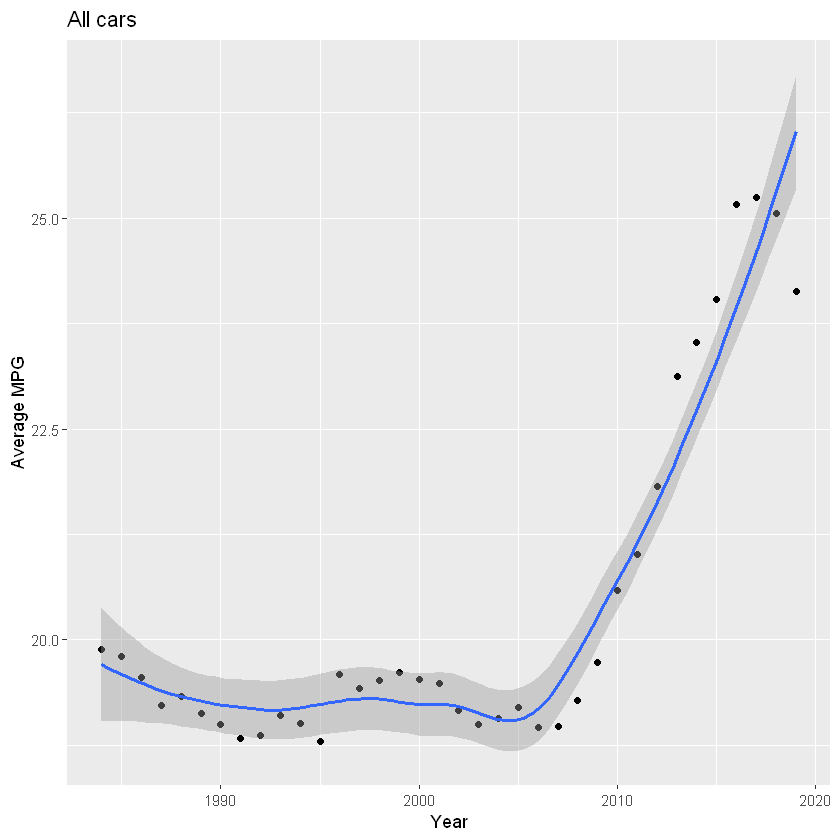

In [25]:
ggplot(mpgByYr, aes(year, avgMPG)) + geom_point() + geom_smooth() + xlab("Year") + ylab("Average MPG") + ggtitle("All cars")

Ya que tenemos un aproximado a la eficiencia del combustible, debemos empezar con explorar los tipos de combustibles que usan los vehiculos. Empezamos generando una table con la función table de la variabel fuelType1

In [26]:
table(vehicles$fuelType1)


           Diesel       Electricity Midgrade Gasoline       Natural Gas 
             1158               177               106                60 
 Premium Gasoline  Regular Gasoline 
            11540             27663 

Primero, vamos a explorar solo los vehiculos que usen gasolina. Para esto usamos la función subset, con la que creamos una nueva variable llamada gasCars donde solo incluimos los que cumplen con los valores "Regular Gasoline","Premium Gasoline" y "Midgrade Gasoline en la variable fuel Type1, ademas de los que cumplen con que tienen valor perdido en fuelType2, y que cumplen con no ser hibridos en la variable atvType
Luego de la variable creada se obtiene un data frame donde se obtiene la distribución por años de los vehiculos que usan gasolina y el promedio de su rendimiento

In [27]:
gasCars <- subset(vehicles, fuelType1 %in% c("Regular Gasoline", "Premium Gasoline", "Midgrade Gasoline") &
fuelType2 == "" & atvType != "Hybrid")
mpgByYr_Gas <- ddply(gasCars, ~year, summarise, avgMPG = mean(comb08))

Ahora para obtener la información gráficaemnte generamos un gráfico de dispersión con el data frame que creamos donde relacionamos los años con la eficiencia de combustible de los vehiculos exclusivamente que usan gasolina

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



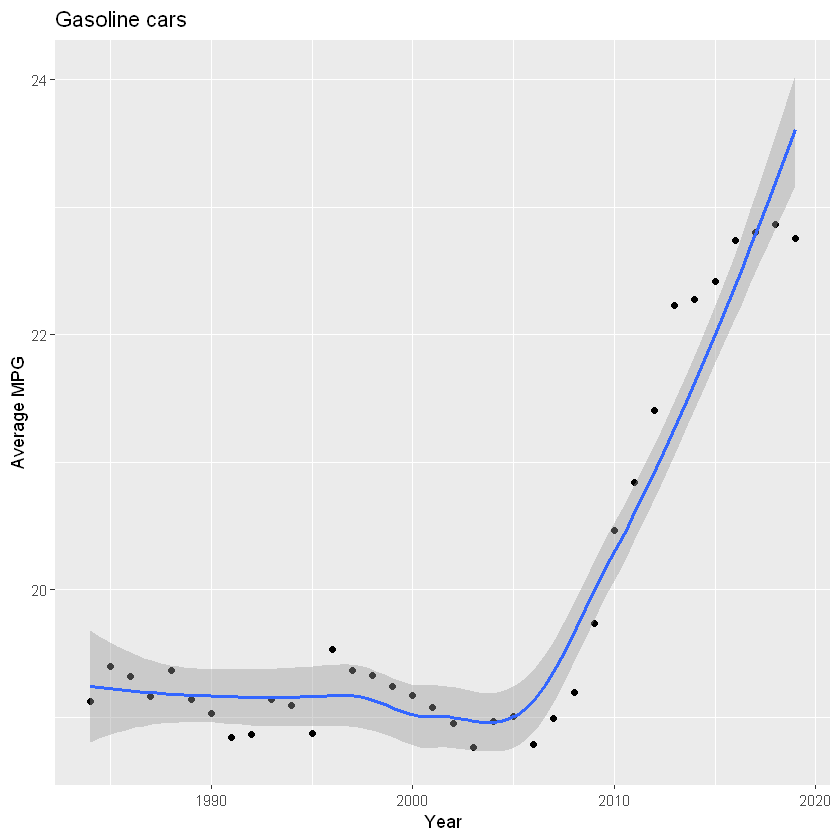

In [28]:
ggplot(mpgByYr_Gas, aes(year, avgMPG)) + geom_point() + geom_smooth() + xlab("Year") + ylab("Average MPG") + ggtitle("Gasoline cars")

La variable displ expresa el desplazamiento del motor en litros, por lo que primero hay q transformarla a una variable numérica

In [29]:
typeof(gasCars$displ)

[1] "double"

In [30]:
gasCars$displ <- as.numeric(gasCars$displ)

y ahora para la exploracion visual generamos un gráfico de dispersión de la relación entre la eficiencia de la gasolina con el engine displacement. Por lo que podemos entender que la existe una relación negativa entre la eficiencia y el desplazamiento del motor

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
"Removed 2 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 2 rows containing missing values (geom_point)."


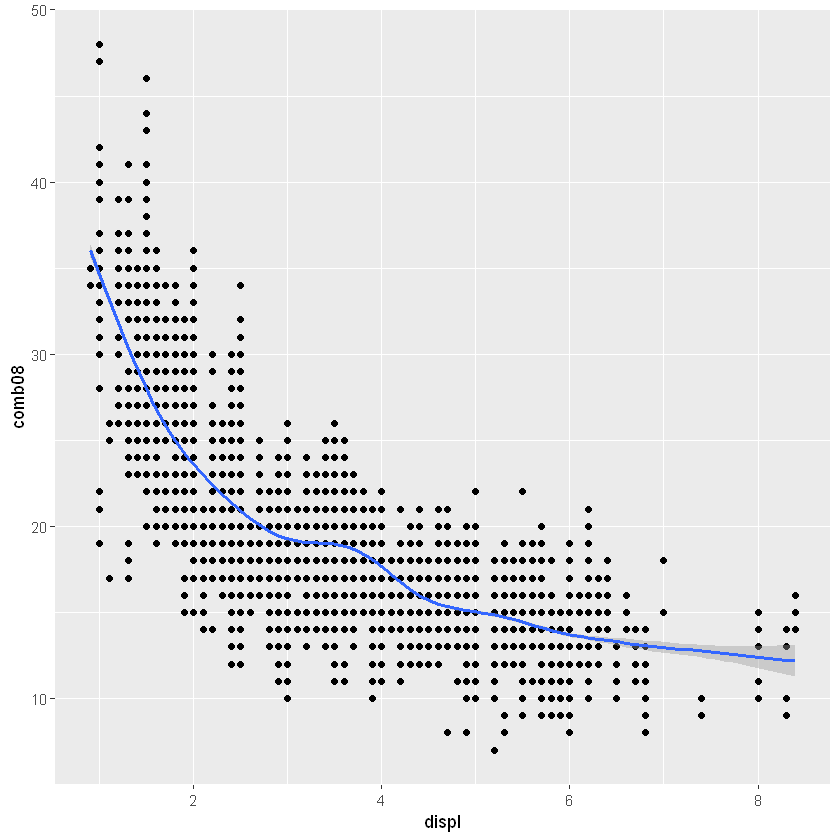

In [31]:
ggplot(gasCars, aes(displ, comb08)) + geom_point() + geom_smooth()

Ahora intentamos encontrar una explicacion a este aumento en la eficiencia, indagando en el tamaño de los motores a través del tiempo

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
"Removed 1 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 1 rows containing missing values (geom_point)."


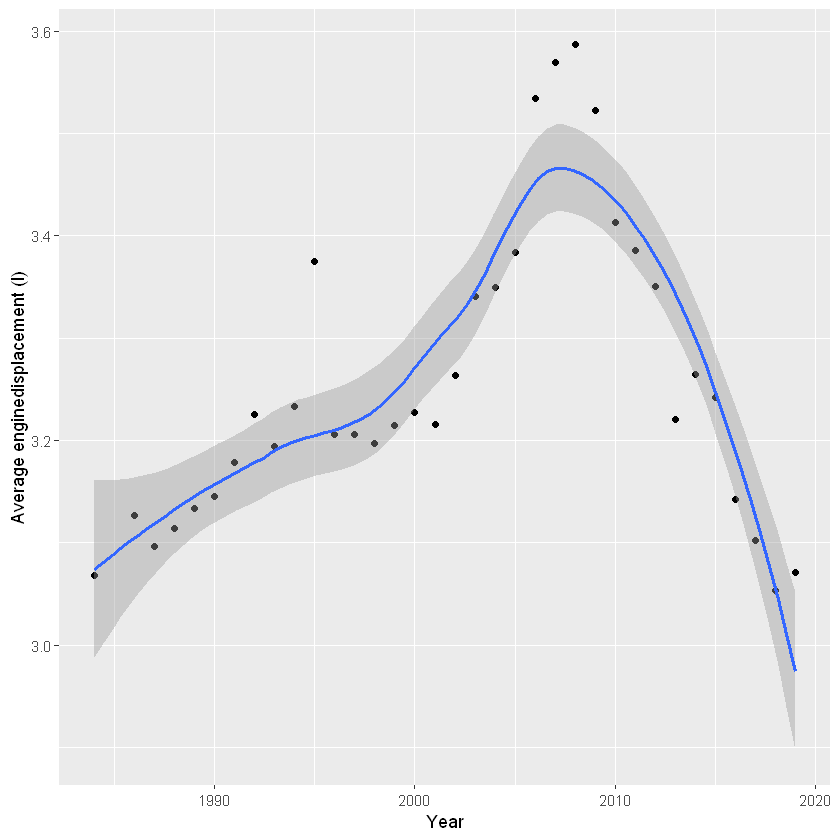

In [32]:
avgCarSize <- ddply(gasCars, ~year, summarise, avgDispl =mean(displ))
ggplot(avgCarSize, aes(year, avgDispl)) + geom_point() + geom_smooth() + xlab("Year") + ylab("Average enginedisplacement (l)")

creamos un nuevo dataframe llamado byYear en el que agregamos el avgMPG (promedio de Miles per Galon, por año) y el avgDispl (el promedio del engine displacement por año) 
Luego la función head nos arroja una muestra los primeros 6 casos para verificar que el dataframe se haya creado con éxito

In [33]:
byYear <- ddply(gasCars, ~year, summarise, avgMPG = mean(comb08), avgDispl = mean(displ))
head(byYear)

,year,avgMPG,avgDispl
,<int>,<dbl>,<dbl>
1,1984,19.12162,3.068449
2,1985,19.39469,NA
3,1986,19.32046,3.126514
4,1987,19.16457,3.096474
5,1988,19.36761,3.113558
6,1989,19.14196,3.133393


Luego del dataframe recién creado se usa la funcion melt para crear un data frame con el id years en el que se expresan los valores average MPG y luego los avgDispl en 3 columnas

In [34]:
byYear2 = melt(byYear, id = "year")
levels(byYear2$variable) <- c("Average MPG", "Avg engine displacement")
head(byYear2)

,year,variable,value
,<int>,<fct>,<dbl>
1,1984,Average MPG,19.12162
2,1985,Average MPG,19.39469
3,1986,Average MPG,19.32046
4,1987,Average MPG,19.16457
5,1988,Average MPG,19.36761
6,1989,Average MPG,19.14196


Y con la funcion facet_wrap de ggplot se generan dos gráficos distintos, uno para la eficiencia de combustible y otra para el engine displacement

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
"Removed 1 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 1 rows containing missing values (geom_point)."


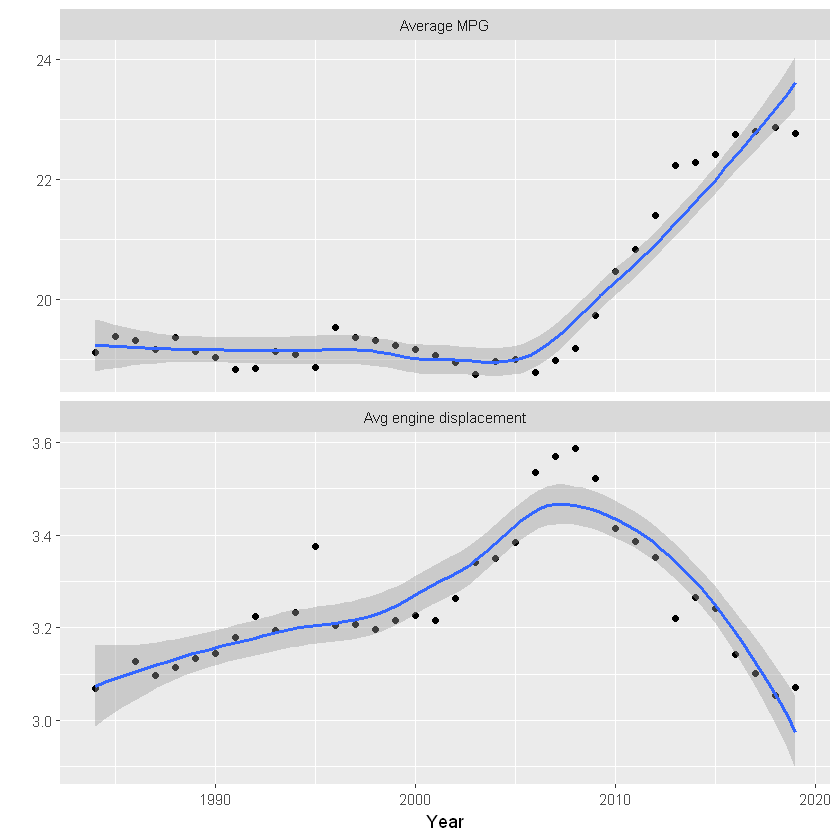

In [35]:
ggplot(byYear2, aes(year, value)) + geom_point() + geom_smooth() + facet_wrap(~variable, ncol = 1, scales = "free_y") + xlab("Year") + ylab("")

para indagar en si la eficiencia de los automoviles se separa con la funcion subset en un dataframe los vehiculos que tengan 4 cilindros de en el motor

In [36]:
 gasCars4 <- subset(gasCars, cylinders == "4")

y por lo generamos dos gráficos, uno para los vehiculos automáticos y otro para los manuales.
La usamos los argumentos de ggplot para especificar el tipo de gráfico que necesitamos, obtenemos un gráfico de caja y bigote con el argumento geom_boxplot y que estén dividiso en automático y manual con el argumento facet_wrap 

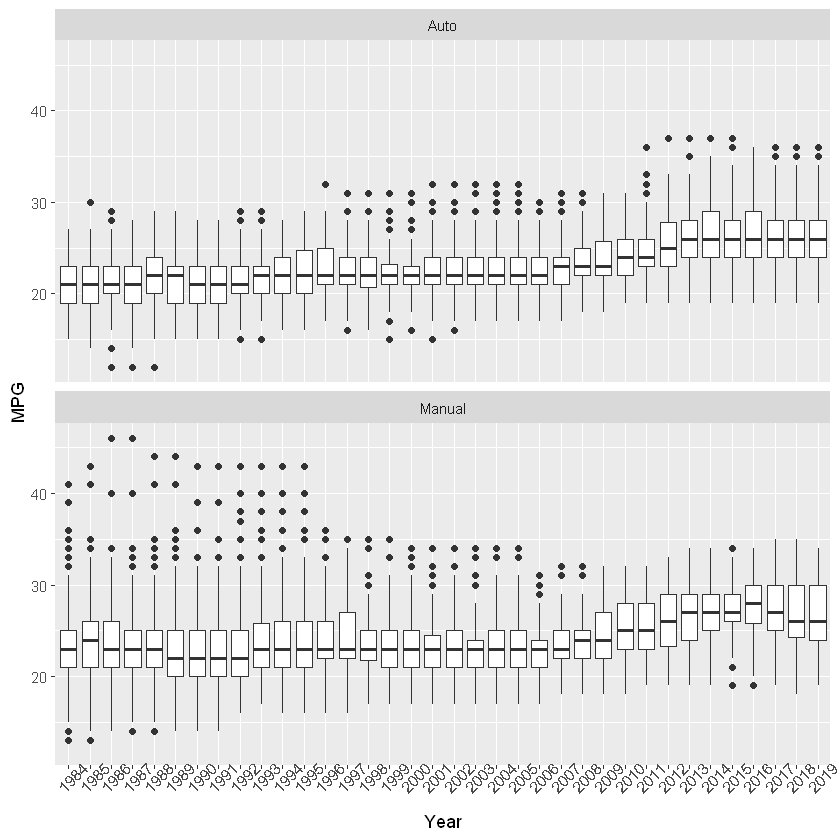

In [37]:
ggplot(gasCars4, aes(factor(year), comb08)) + geom_boxplot() + facet_wrap(~trany2, ncol = 1) + theme(axis.text.x = element_text(angle = 45)) + labs(x = "Year", y = "MPG")

Seguimos con generar un gráfico de proporciones entre la cantidad de modelos de transmision manual y automática se crean por año, con este gráfico podemos deducir que a partir del 2005 la proporción se inclinó progresivamente a un aumento de autos con transmisión automática, finalizando con que ya los modelos de 2009 al rededor del 80% de los modelos tienen una transmisión automática

In [38]:
gasCars4

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb,trany2
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,...,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>
1,15.69571,0,0,0,19,0,0,0,0,0,...,,0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0,Manual
3,12.20778,0,0,0,23,0,0,0,0,0,...,,0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0,Manual
5,17.34789,0,0,0,17,0,0,0,0,0,...,,0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0,Manual
6,14.98227,0,0,0,21,0,0,0,0,0,...,,0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0,Auto
7,13.18440,0,0,0,22,0,0,0,0,0,...,,0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0,Manual
8,13.73375,0,0,0,23,0,0,0,0,0,...,,0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0,Auto
9,12.67731,0,0,0,23,0,0,0,0,0,...,,0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0,Manual
10,13.18440,0,0,0,23,0,0,0,0,0,...,,0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0,Auto
11,12.67731,0,0,0,23,0,0,0,0,0,...,,0,,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0,Manual


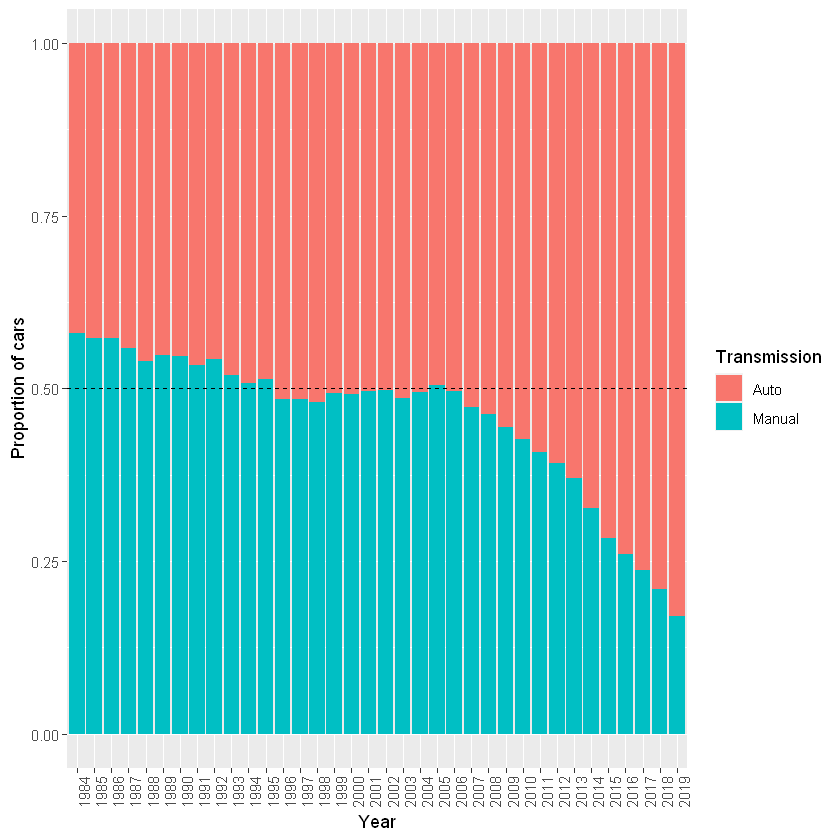

In [42]:
ggplot(gasCars4, aes(factor(year), fill = factor(trany2))) + geom_bar(position = "fill") + labs(x = "Year", y = "Proportion of cars", fill = "Transmission") +  geom_hline(yintercept = 0.5, linetype = 2)+theme(axis.text.x = element_text(angle = 90))

## Investigando las marcas y modelos de automobiles

creamos una variable llamada carsMake donde se seara por año la cantidad de valores unicos encontrados en la variable make

In [43]:
carsMake <- ddply(gasCars4, ~year, summarise, numberOfMakes = length(unique(make)))
carsMake

year,numberOfMakes
<int>,<int>
1984,37
1985,36
1986,37
1987,38
1988,42
1989,37
1990,35
1991,38
1992,37


Y buscamos obtener esta información de manera gráfica, por lo que generamos el gráfico de dispersion que nos muestra cuantas marcas distintas se tienen en esta base de datos por año (de solo autos con 4 cilindros, dado que acotamos el rango a solo 4 cilindros anteriormente)

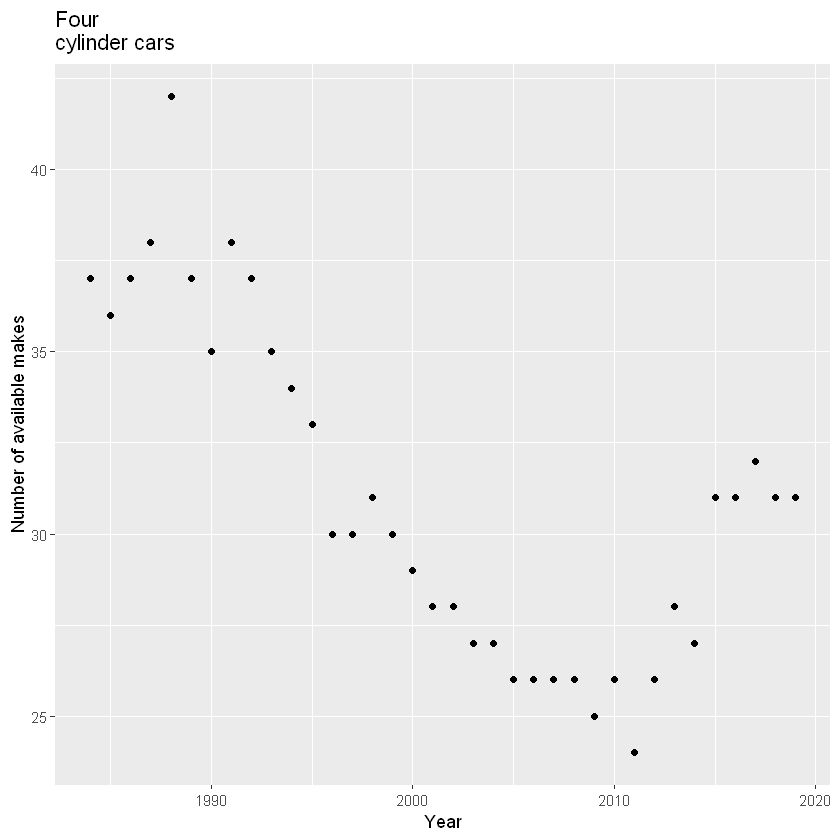

In [44]:
ggplot(carsMake, aes(year, numberOfMakes)) + geom_point() +
labs(x = "Year", y = "Number of available makes") + ggtitle("Four
cylinder cars")

usamos lafuncion dlply para arrojarnos por cada año cada valor único que encontramos 

In [45]:
uniqMakes <- dlply(gasCars4, ~year, function(x)unique(x$make))
uniqMakes

$`1984`
 [1] "Alfa Romeo"                    "Bertone"                      
 [3] "Ford"                          "Honda"                        
 [5] "Lotus"                         "Pininfarina"                  
 [7] "Pontiac"                       "Porsche"                      
 [9] "Toyota"                        "Volkswagen"                   
[11] "Audi"                          "BMW"                          
[13] "Chevrolet"                     "Chrysler"                     
[15] "Nissan"                        "Dodge"                        
[17] "Isuzu"                         "Mercury"                      
[19] "Mazda"                         "Mercedes-Benz"                
[21] "Mitsubishi"                    "Plymouth"                     
[23] "Renault"                       "Subaru"                       
[25] "Buick"                         "Cadillac"                     
[27] "Bill Dovell Motor Car Company" "Oldsmobile"                   
[29] "Peugeot"                       "Saab"                         
[31] "Volvo"                         "GMC"                          
[33] "Import Foreign Auto Sales Inc" "Jeep"                         
[35] "Suzuki"                        "AM General"                   
[37] "American Motors Corporation"  

$`1985`
 [1] "Alfa Romeo"                    "Dodge"                        
 [3] "GMC"                           "Toyota"                       
 [5] "Volkswagen"                    "AM General"                   
 [7] "Chevrolet"                     "Jeep"                         
 [9] "Plymouth"                      "Isuzu"                        
[11] "Mitsubishi"                    "Subaru"                       
[13] "Suzuki"                        "Nissan"                       
[15] "Ford"                          "Honda"                        
[17] "Chrysler"                      "Mercury"                      
[19] "Mazda"                         "Pontiac"                      
[21] "Buick"                         "Cadillac"                     
[23] "Oldsmobile"                    "Volvo"                        
[25] "Mercedes-Benz"                 "Bertone"                      
[27] "Lotus"                         "Renault"                      
[29] "Pininfarina"                   "Bill Dovell Motor Car Company"
[31] "Porsche"                       "Merkur"                       
[33] "Peugeot"                       "Saab"                         
[35] "Audi"                          "BMW"                          

$`1986`
 [1] "Alfa Romeo"                  "Bertone"                    
 [3] "Ford"                        "Honda"                      
 [5] "Panther Car Company Limited" "Pontiac"                    
 [7] "Subaru"                      "Toyota"                     
 [9] "Porsche"                     "Volkswagen"                 
[11] "Yugo"                        "Audi"                       
[13] "Chevrolet"                   "Chrysler"                   
[15] "Nissan"                      "Dodge"                      
[17] "Acura"                       "Hyundai"                    
[19] "Isuzu"                       "Mercury"                    
[21] "Mercedes-Benz"               "Mitsubishi"                 
[23] "Plymouth"                    "Renault"                    
[25] "Buick"                       "Cadillac"                   
[27] "Merkur"                      "Mazda"                      
[29] "Oldsmobile"                  "Peugeot"                    
[31] "Saab"                        "Volvo"                      
[33] "London Coach Co Inc"         "GMC"                        
[35] "Jeep"                        "Suzuki"                     
[37] "Volga Associated Automobile"

$`1987`
 [1] "Ford"           "Mazda"          "Alfa Romeo"     "Bertone"       
 [5] "CX Automotive"  "Honda"          "Lotus"          "Pontiac"       
 [9] "Red Shift Ltd." "Subaru"         "Toyota"         "Porsche"       
[13] "Volkswagen"   

Y usamos la funcion reduce para solo contar los intersectos en los vectores de uniqMakes.
Por lo tanto encontramos que solo 10 marcas han generado automoviles de 4 cilindros desde 1984 hasta 2009 en esta base de datos

In [47]:
commonMakes <- Reduce(intersect, uniqMakes)
print(commonMakes)

 [1] "Ford"       "Honda"      "Toyota"     "Volkswagen" "Chevrolet" 
 [6] "Nissan"     "Mazda"      "Mitsubishi" "Subaru"     "Jeep"      


A partir de eso queremos indagar sobre la eficiencia de combustible por cada marca que se ha mantenido en el tiempo.
Por lo tanto generamos variable carsCommonMakes4 en la que se separan por marcas los valores encontrados que tenemos.
Luego generamos un dataframe avgMPG_commonMakes en donde ordenamos con la funccion ddply el dataframe que recién creamos pero los separamos por año y marca, y su respectiva eficiencia de combustible.
Por lo tanto obtenemos un data frame donde primero tenemos los datos de las 10 marcas comunes, de 1984 y sus respectivas eficiencias. Luego con los del 1985 y así consecutivamente
Para terminar con el análisis de marcas. Generamos la descripción gráfica haciendo gráficos para cada marca.
Usamos ggplot y el data frame que acabamos de crear (avgMPG_commonMakes, usamos la variables year y avgMPG para cada uno de los gráficos (siento los ejes X e Y respectivamente) y los separamos por marcas con el argumento facer_wrap ~make.

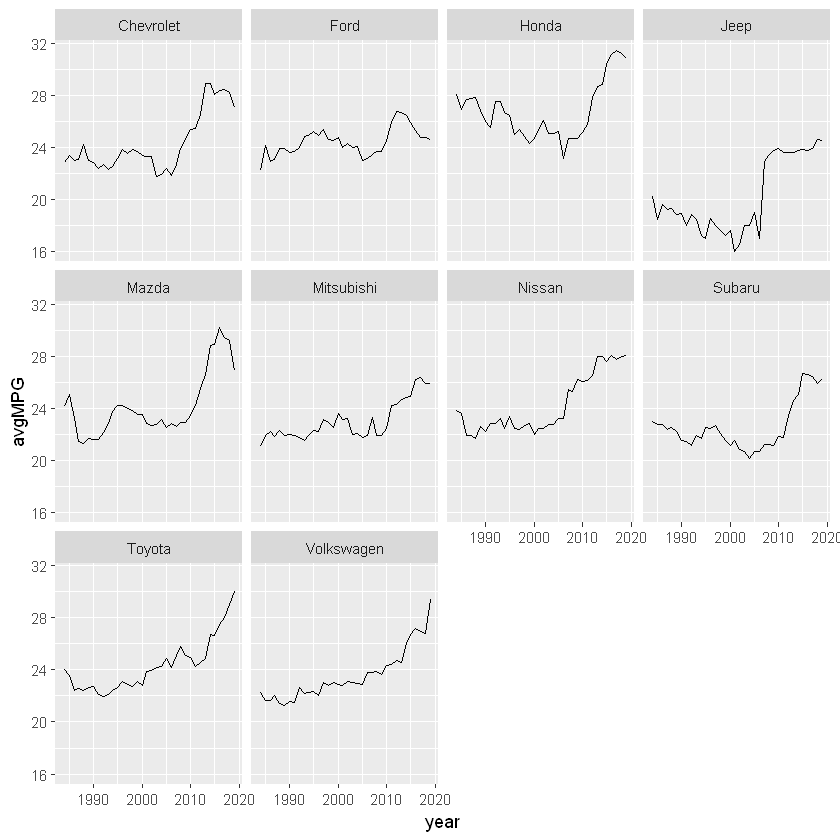

In [48]:
carsCommonMakes4 <- subset(gasCars4, make %in% commonMakes)
avgMPG_commonMakes <- ddply(carsCommonMakes4, ~year + make,summarise, avgMPG = mean(comb08))
ggplot(avgMPG_commonMakes, aes(year, avgMPG)) + geom_line() + facet_wrap(~make, nrow = 3)

In [49]:
avgMPG_commonMakes

year,make,avgMPG
<int>,<chr>,<dbl>
1984,Chevrolet,22.84375
1984,Ford,22.19697
1984,Honda,28.08333
1984,Jeep,20.25000
1984,Mazda,24.16667
1984,Mitsubishi,21.07018
1984,Nissan,23.81818
1984,Subaru,23.02941
1984,Toyota,24.03509


Lo siguien será generar una tabla donde se presenten de manera numérica las proporción año a año de la cantidad de autos automáticos y manuales creados.
Primero utilizamos la funcion prop para crear un data frame donde se relacionen los años y las variables trany2 que fue creada antes

In [50]:
prop = data.frame("Año"= vehicles$year, "transmision" = vehicles$trany2)
prop

Año,transmision
<int>,<fct>
1985,Manual
1985,Manual
1985,Manual
1985,Auto
1993,Manual
1993,Auto
1993,Manual
1993,Auto
1993,Manual


seguimos con generar la variable tabla que la denominamos data frame donde usamos la funcion unique para en la primera columna se seleccione un valor unico de cada año, luego creamos una matriz y usamos la funcion prop table para crear una tabla con proporciones de los valores por cada año de automaticos y manual

In [51]:
tabla <- data.frame(unique(vehicles$year), (matrix(prop.table(table(prop),1),nrow = 36, ncol = 2)))
names (tabla)= c ("Año" , "Automático", "Manual")
tabla

Año,Automático,Manual
<int>,<dbl>,<dbl>
1985,0.5382263,0.4617737
1993,0.5385068,0.4614932
1994,0.5264463,0.4735537
1995,0.5308741,0.4691259
1996,0.5424779,0.4575221
1997,0.5472680,0.4527320
1998,0.5640074,0.4359926
1999,0.5565371,0.4434629
2000,0.5869759,0.4130241


Lo siguien que haremos será crear un gráfico con una regresión lineal simple de la relación entre cada año y la cantidad de marcas que crearon autos ese mismo año.
primero comenzamos con modificar los nombres de la tabla antes creada, solo para que sea más fácil de trabajar con ellas

In [52]:
names (carsMake) <- c("Año","Marcas")
carsMake

Año,Marcas
<int>,<int>
1984,37
1985,36
1986,37
1987,38
1988,42
1989,37
1990,35
1991,38
1992,37


luego también por términos de facilitar el trabajo le cambiamos el nombre de las variable a x e y 

In [53]:
x <- carsMake$Año
y <- carsMake$Marcas

seguimos creando una variable llamada lmm (lineal model de marcas) donde tendremos acumulada los valores de una recta de regresion usando la función lm. Viendo los valores que arroja esta variable creada se ve que el teniendo un eje X e Y donde X son los años e Y los numeros de marcas tenemos que la recta interceptaria en el 663 cuando el valor de X fuese 0. a su vez, también entendemos que la pendiente de la recta creada es -0.316, por lo tanto se entiende que el valor de año y marcas unicas tienen una relación negativa, osea que, cuanto más años pasan, menos marcas hay.


También usamos la función summary de la variable creada para que nos arroje una descripción de la recta de regresión. Donde se nos entrega el Error estimado y el R cuadrado entre otros valores.

In [54]:
lmm = lm (y ~ x)
lmm
summary (lmm)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
    663.364       -0.316  



Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9706 -2.8403 -0.1057  2.1703  6.7623 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 663.36379  104.94438   6.321 3.31e-07 ***
x            -0.31596    0.05243  -6.026 7.97e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.268 on 34 degrees of freedom
Multiple R-squared:  0.5164,	Adjusted R-squared:  0.5022 
F-statistic: 36.31 on 1 and 34 DF,  p-value: 7.968e-07


A continuación procedemos a agregar al gráfico la recta creada con la función abline para el gráfico.

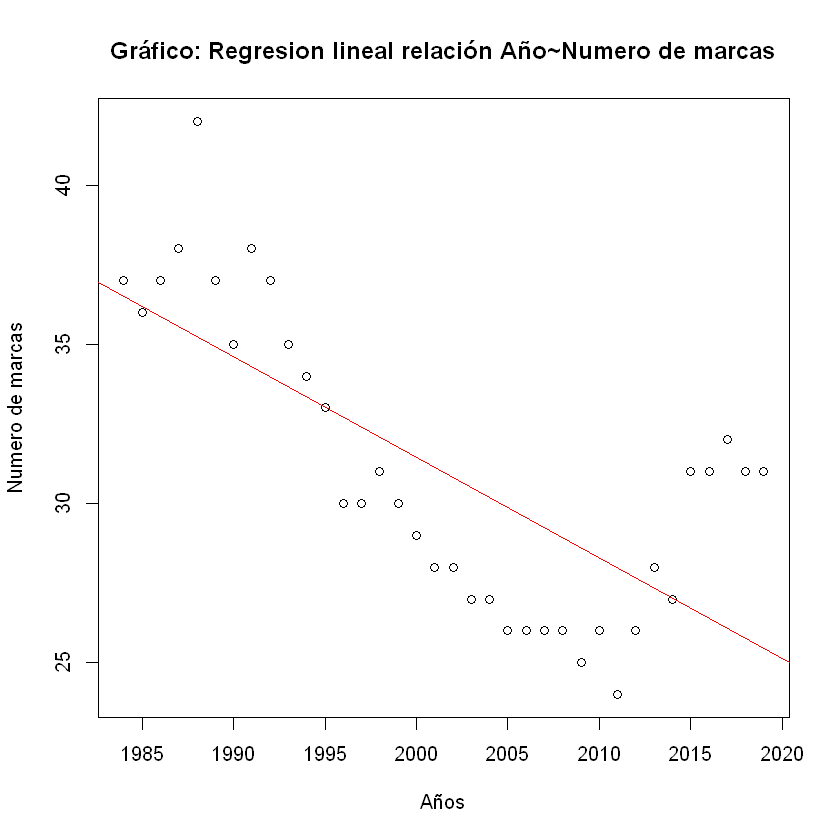

In [55]:
plot(x, y, xlab = "Años", ylab = "Numero de marcas", main="Gráfico: Regresion lineal relación Año~Numero de marcas")
abline(lmm, col = "red")


# Conclusión
Respecto de las conclusiónes y inferencias que se pueden adquirir acerca de los datos analizados en este proyecto son variados, información importante y de una alta utilidad.
Podemos obtener que la eficiencia de los combustibles tuvo una evolución considerable a partir del 2000, la que también se le puede relacionar con el crecimiento de los motores y los cilindros en los motores que tuvo un constante crecimiento hasta el 2005, que luego tuvo un retroceso, pero que por una simple interpretación se puede entender que la minoria del cilindros no afectó la eficiencia por lo que los cilindros y el funcionamiento del motor debe haberse aumentado a partir de los mediados de la decada del 2000.
También se otorga que no existe una considerable relación entre la eficiencia de combustible con el tipo de tranmisión que tien el vehiculo, y que la proporción de la transmision en los autos generados a partir del 2005 empezó a inclinarse hacia los autos automáticos dejando a los manuales llegando a ser una considerable minoria el día de hoy en los modelos nuevos.
Por último en el análisis de las marcas se obtiene que  hay marcas que no han tenido un gran avanze respecto de la eficiencia de su combustible, a diferencia de algunas como por ejemplo Toyota, Nissan y Volkswagen que tienen una consirable eficiencia en relación al resto de las marcas comunes. 

Para finalizar cabe destacar que la utilidad en el análizis y síntesis gráfico de los datos que tiene R y sus librerias como ggplot aumenta la eficiencia del trabajo de bases de datos de grandes cantidades de casos que serían casi imposible llevar a cabo a mano. Por lo que resulta ser una herramienta necesaria y de extrema utilidad.

# Referencias
### • *Ojeda, T., Murphy, S. P., Bengfort, B., & Dasgupta, A. (2014). Practical data science cookbook. Packt Publishing Ltd*